In [31]:
import librosa
audio_file_path = "D:/UrbanSound8K/UrbanSound8K/audio/fold7/101848-9-0-1.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [32]:
print(librosa_audio_data)

[-0.06422874 -0.08610839 -0.06466714 ... -0.00842047 -0.00468988
  0.00184786]


In [33]:
import IPython.display as ipd
ipd.Audio(librosa_audio_data, rate=librosa_sample_rate)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

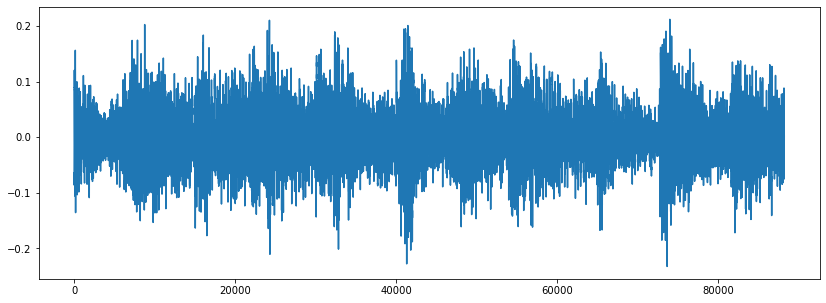

In [35]:
plt.figure(figsize=(14,5))
plt.plot(librosa_audio_data)
plt.show()

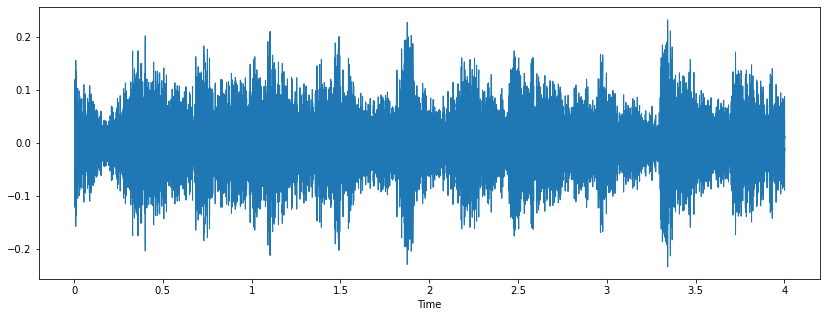

In [36]:
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)
plt.show()

# Observation

In [37]:
from scipy.io import wavfile as wav
wav_sample_rate, wave_audio = wav.read(audio_file_path)

In [40]:
wave_audio

array([[-3369, -2486],
       [-2975, -2502],
       [-2750, -2411],
       ...,
       [  -92,  -126],
       [    8,   175],
       [  -22,   381]], dtype=int16)

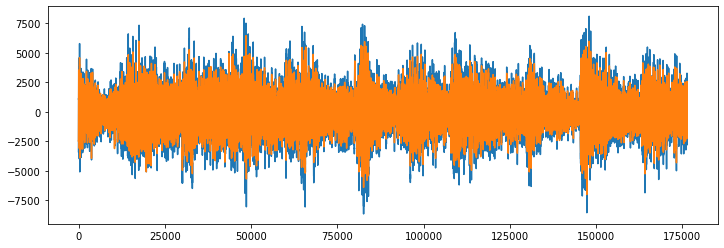

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.show()

# Extract Features

In [45]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
mfccs.shape

(40, 173)

In [46]:
mfccs

array([[-2.3240311e+02, -2.3009439e+02, -2.4082117e+02, ...,
        -2.3677542e+02, -2.3104282e+02, -2.4635371e+02],
       [ 1.5043347e+02,  1.6041823e+02,  1.6044437e+02, ...,
         1.6546060e+02,  1.6271078e+02,  1.6132886e+02],
       [ 6.9470429e+00, -2.3897667e+00,  4.9603138e+00, ...,
        -1.2059373e+01, -1.1690070e+01, -1.0290559e+01],
       ...,
       [ 3.9873013e+00,  3.9760089e+00,  2.6308072e+00, ...,
        -6.8345551e+00, -2.1469169e+00, -1.9215963e+00],
       [ 3.4422486e+00,  7.0525616e-01, -2.3674593e+00, ...,
        -8.3896999e+00, -1.1742476e+01, -9.2714233e+00],
       [ 4.8357754e+00,  4.9201846e+00,  1.7490494e-01, ...,
         8.2061827e-02, -6.8009996e-01,  1.2215496e+00]], dtype=float32)

In [47]:
# Extracting MFCC's for every audio file
import pandas as pd
import os
import librosa

In [48]:
audio_dataset_path = "D:/UrbanSound8K/UrbanSound8K/audio"
metadata = pd.read_csv("D:/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")

In [49]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [51]:
def features_extrator(file):
    audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    
    return mfccs_scaled_features

In [52]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extrator(file_name)
    extracted_features.append([data,final_class_labels])

3555it [08:59,  7.15it/s]C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [21:22,  8.72it/s]C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8329it [21:23, 10.62it/s]C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [22:23,  6.50it/s]


In [53]:
extracted_features

[[array([-2.2379651e+02,  1.4906343e+02, -8.2319841e+00,  1.3930850e+01,
          7.9379754e+00,  1.3179854e+01, -1.1844836e+01,  1.1901626e+01,
          3.1142812e+00,  3.2208612e+00, -1.0130539e+01,  5.1386547e+00,
         -7.1921740e+00,  8.1136398e-02, -6.5543642e+00, -2.5903907e+00,
         -1.1506342e+01,  3.6853702e+00, -6.2394285e+00, -2.3608398e-01,
         -7.6123328e+00,  3.1315953e-01, -8.8724432e+00,  1.1329297e+00,
         -4.7369342e+00,  8.1158203e-01, -3.1458077e+00,  5.0832920e+00,
         -1.9213918e-01,  3.4245422e+00, -6.6426620e+00, -1.4032264e+00,
         -3.4081044e+00,  3.6144400e+00, -4.1624599e+00,  1.6569513e-01,
         -6.0678964e+00, -1.7655191e+00, -3.6755416e+00, -4.4156390e-01],
        dtype=float32),
  'dog_bark'],
 [array([-2.2379651e+02,  1.4906343e+02, -8.2319841e+00,  1.3930850e+01,
          7.9379754e+00,  1.3179854e+01, -1.1844836e+01,  1.1901626e+01,
          3.1142812e+00,  3.2208612e+00, -1.0130539e+01,  5.1386547e+00,
         -7

In [54]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-223.79651, 149.06343, -8.231984, 13.93085, 7...",dog_bark
1,"[-223.79651, 149.06343, -8.231984, 13.93085, 7...",children_playing
2,"[-223.79651, 149.06343, -8.231984, 13.93085, 7...",children_playing
3,"[-223.79651, 149.06343, -8.231984, 13.93085, 7...",children_playing
4,"[-223.79651, 149.06343, -8.231984, 13.93085, 7...",children_playing


In [55]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [56]:
X.shape

(8732, 40)

In [67]:
extracted_features_df['class'][0:10]

0            dog_bark
1    children_playing
2    children_playing
3    children_playing
4    children_playing
5    children_playing
6    children_playing
7    children_playing
8    children_playing
9            car_horn
Name: class, dtype: object

In [58]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [59]:
y = np.array(pd.get_dummies(y))

In [69]:
y.shape

(8732, 10)

In [60]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [68]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
X_train.shape

(6985, 40)

In [71]:
X_test.shape

(1747, 40)

In [72]:
y_train.shape

(6985, 10)

In [73]:
y_test.shape

(1747, 10)